In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix
import GetLightcurves as gc

In [3]:
#network and training parameters:
BATCH_SIZE = 128
VERBOSE = 1 #no idea what this is but lets see...
VAL_SPLIT = 0.2  #how much of sample is reserved for validation

In [51]:
Xtrain=np.loadtxt('training_data/Xtrain_no_npl.csv',delimiter=',')
Ytrain=np.loadtxt('training_data/Ytrain_no_npl.csv',delimiter=',')
Xtest=np.loadtxt('training_data/Xtest_no_npl.csv',delimiter=',')
Ytest=np.loadtxt('training_data/Ytest_no_npl.csv',delimiter=',')
print(Xtrain.shape,Ytrain.shape,Xtest.shape,Ytest.shape)

(4000, 2000) (4000, 2) (200, 2000) (200, 2)


In [53]:
Xtrain2=np.loadtxt('training_data/Xtrain_no_fps.csv',delimiter=',')
Ytrain2=np.loadtxt('training_data/Ytrain_no_fps.csv',delimiter=',')
Xtest2=np.loadtxt('training_data/Xtest_no_fps.csv',delimiter=',')
Ytest2=np.loadtxt('training_data/Ytest_no_fps.csv',delimiter=',')
print(Xtrain2.shape,Ytrain2.shape,Xtest2.shape,Ytest2.shape)

(4000, 2000) (4000, 2) (200, 2000) (200, 2)


In [4]:
Xtrainl,Xtrain,Ytrain,IDtrain = gc.read_tfr_record('../../training_data/total_ts_av_train',['local','global','label','id'],
    ['ar','ar','ar','b'],[tf.float32,tf.float32,tf.bool, tf.string])
Xtestl,Xtest,Ytest, IDtest = gc.read_tfr_record('../../training_data/total_ts_av_test',['local','global','label','id'],
    ['ar','ar','ar','b'],[tf.float32,tf.float32,tf.bool, tf.string])

Ytrain = np.asarray(Ytrain, dtype='float32')
Ytest = np.asarray(Ytest, dtype='float32')
Xtrain = np.asarray(Xtrain, dtype='float32')
Xtrainl = np.asarray(Xtrainl, dtype='float32')
Xtest = np.asarray(Xtest, dtype='float32')
Xtestl = np.asarray(Xtestl, dtype='float32')

In [39]:
#Xtrainl_n = [(row - np.median(row))/(np.median(row)-min(row)) for row in Xtrainl]
#Xtestl_n = [(row - np.median(row))/(np.median(row)-min(row)) for row in Xtestl]
Xtrainl_n = [np.tanh(100*row) for row in Xtrainl]
Xtestl_n = [np.tanh(100*row) for row in Xtestl]

In [76]:
#got the training set ... now write the neural net
#buid the model
#SGD stochastic gradient descent... 
DROPOUT=0.3
IP=4000
TEST=200
np.random.seed(11223)

arr=np.arange(0,IP,1)
np.random.shuffle(arr)
Xtrain=[Xtrain[i] for i in arr]
Ytrain=[Ytrain[i] for i in arr]

arr=np.arange(0,TEST,1)
np.random.shuffle(arr)
Xtest=[Xtest[i] for i in arr]
Ytest=[Ytest[i] for i in arr]

#kernel_size = 5
#kernel = np.ones(kernel_size) / kernel_size
#Xtrain = [np.convolve(Xtrain[i], kernel, mode='same') for i in range(IP)]
#Xtest = [np.convolve(Xtest[i], kernel, mode='same') for i in range(TEST)]
#Xtrain_new=np.array(Xtrain).reshape(5700,500,4)
#print(Xtrain_new.shape)

ip = keras.layers.Input(shape=(2000,),name='Input')
x=keras.layers.Dense(256,name='dense_layer_1',activation='relu')(ip)
x=keras.layers.Dropout(0.2)(x)
x=keras.layers.Dense(128,name='dense_layer_2',activation='relu')(ip)
x=keras.layers.Dropout(0.2)(x)
x=keras.layers.Dense(64,name='dense_layer_3',activation='relu')(x)
x=keras.layers.Dropout(0.2)(x)
x=keras.layers.Dense(32,name='dense_layer_4',activation='relu')(x)
x=keras.layers.Dropout(0.2)(x)
op=keras.layers.Dense(2,name='dense_layer_5',activation='softmax')(x)
convNN = keras.Model(inputs=ip, outputs=op,name='Convolutional_NN')
#add hidden layers
#conv_ip = keras.layers.Input(shape=(2000,),name='Input')
#x=keras.layers.Reshape((2000, 1), input_shape=(2000,),name='reshape_1')(conv_ip)
#x=keras.layers.BatchNormalization()(x)
#x=keras.layers.Conv1D(16,kernel_size=5,strides=2,activation='relu',name='conv16_5')(x) 
#x=keras.layers.Conv1D(16,kernel_size=5,strides=2,activation='relu',name='second_conv16_5')(x)
#x=keras.layers.MaxPool1D(3,strides=3,data_format='channels_last',name='maxpool_1')(x)
#x=keras.layers.Conv1D(32,kernel_size=5,strides=1,activation='relu',name='first_conv32_5')(checkf)
#x=keras.layers.Conv1D(32,kernel_size=5,strides=1,activation='relu',name='second_conv32_5')(x)
#x=keras.layers.MaxPool1D(3,strides=3,data_format='channels_last',name='maxpool_2')(x)
#x=keras.layers.Conv1D(64,kernel_size=5,strides=1,activation='relu',name='conv64_5')(x)
#x=keras.layers.Conv1D(64,kernel_size=5,strides=1,activation='relu',name='conv64_5_2')(x)
#x=keras.layers.MaxPool1D(3,strides=3,data_format='channels_last',name='maxpool_3')(x)
#x=keras.layers.Flatten(name='flat_1')(x)
#x=keras.layers.Dense(16,name='dense_layer_1',activation='relu')(x)
#conv_op=keras.layers.Dense(2,name='dense_layer_2',activation='softmax')(x)


#convNN = keras.Model(inputs=conv_ip, outputs=conv_op,name='Convolutional_NN')

#featuresNN = keras.Model(inputs=conv_ip, outputs=checkf)

convNN.summary()
convNN.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])

Model: "Convolutional_NN"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input (InputLayer)           [(None, 2000)]            0         
_________________________________________________________________
dense_layer_2 (Dense)        (None, 256)               512256    
_________________________________________________________________
dropout_31 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_layer_3 (Dense)        (None, 128)               32896     
_________________________________________________________________
dense_layer_4 (Dense)        (None, 64)                8256      
_________________________________________________________________
dropout_32 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_layer_5 (Dense)        (None, 2)            

<function matplotlib.pyplot.show(close=None, block=None)>

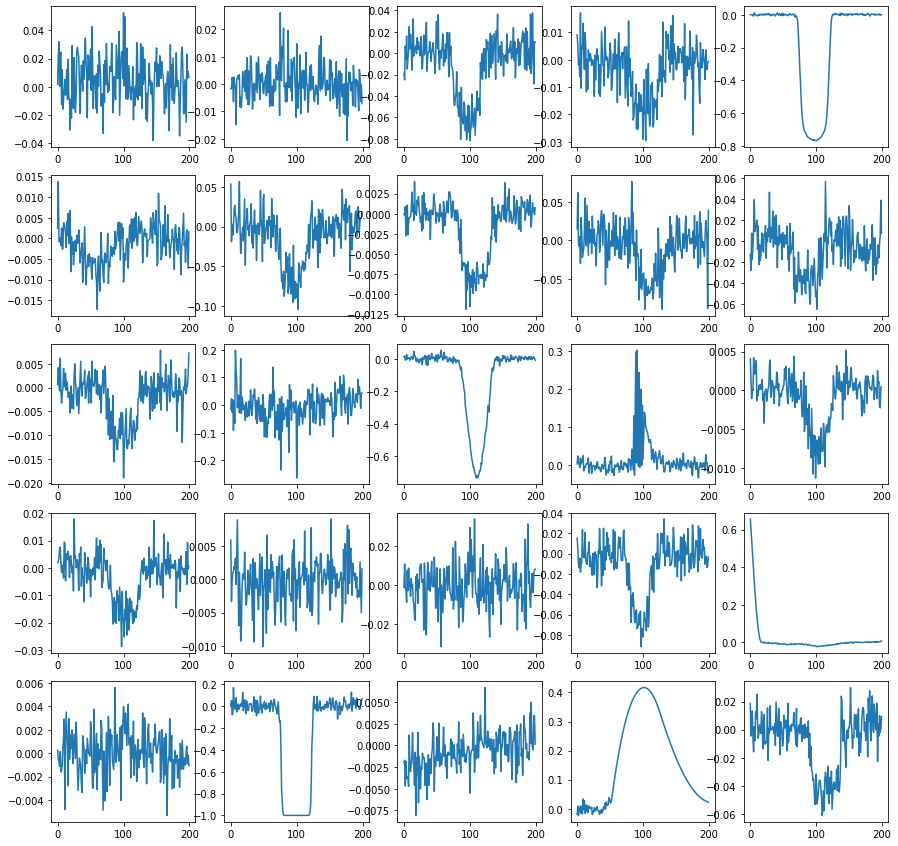

In [40]:
nums=np.random.randint(0,len(Xtrain), 30)
fig, ax = plt.subplots(5,5,figsize = (15,15))
i=0
j=0
for el in nums:
    ax[i][j].plot(Xtrainl_n[el])
    i+=1
    if(i==5):
        i=0
        j+=1
    if(j==5): break
plt.show

In [42]:

DROPOUT=0.3
IP=4000
TEST=200
np.random.seed(11223)

#add hidden layers
conv_ip2 = keras.layers.Input(shape=(200,),name='Input')
x2=keras.layers.Reshape((200, 1), input_shape=(200,),name='reshape_1')(conv_ip2)
x2=keras.layers.BatchNormalization()(x2)
x2=keras.layers.Conv1D(16,kernel_size=5,strides=2,activation='tanh',name='conv16_5')(x2) 
x2=keras.layers.Conv1D(16,kernel_size=5,strides=2,activation='tanh',name='second_conv16_5')(x2)
checkf2=keras.layers.MaxPool1D(3,strides=1,data_format='channels_last',name='maxpool_1')(x2)
x2=keras.layers.Conv1D(32,kernel_size=5,strides=1,activation='tanh',name='first_conv32_5')(checkf2)
x2=keras.layers.Conv1D(32,kernel_size=5,strides=1,activation='tanh',name='second_conv32_5')(x2)
x2=keras.layers.MaxPool1D(3,strides=1,data_format='channels_last',name='maxpool_2')(x2)
x2=keras.layers.Conv1D(64,kernel_size=5,strides=1,activation='tanh',name='conv64_5')(x2)
x2=keras.layers.Conv1D(64,kernel_size=5,strides=1,activation='tanh',name='conv64_5_2')(x2)
x2=keras.layers.MaxPool1D(3,strides=1,data_format='channels_last',name='maxpool_3')(x2)
x2=keras.layers.Flatten(name='flat_1')(x2)
x2=keras.layers.Dense(64,name='dense_layer_1',activation='relu')(x2)
x2=keras.layers.Dense(64,name='dense_layer_2',activation='relu')(x2)
x2=keras.layers.Dense(64,name='dense_layer_3',activation='relu')(x2)
conv_op2=keras.layers.Dense(2,name='dense_layer_4',activation='softmax')(x2)


convNN2 = keras.Model(inputs=conv_ip2, outputs=conv_op2,name='Convolutional_NN')

featuresNN2 = keras.Model(inputs=conv_ip2, outputs=checkf2)

convNN2.summary()
convNN2.compile(optimizer=keras.optimizers.Adam(learning_rate=0.00005), loss='categorical_crossentropy',metrics=['accuracy'])

Model: "Convolutional_NN"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input (InputLayer)           [(None, 200)]             0         
_________________________________________________________________
reshape_1 (Reshape)          (None, 200, 1)            0         
_________________________________________________________________
batch_normalization_7 (Batch (None, 200, 1)            4         
_________________________________________________________________
conv16_5 (Conv1D)            (None, 98, 16)            96        
_________________________________________________________________
second_conv16_5 (Conv1D)     (None, 47, 16)            1296      
_________________________________________________________________
maxpool_1 (MaxPooling1D)     (None, 45, 16)            0         
_________________________________________________________________
first_conv32_5 (Conv1D)      (None, 41, 32)       

In [44]:
es_callback = keras.callbacks.EarlyStopping(monitor='val_loss', patience=15)
history=convNN2.fit(np.asarray(Xtrainl_n),np.asarray(Ytrain), batch_size=256, epochs=70, verbose=VERBOSE, validation_split=VAL_SPLIT, callbacks=[es_callback])

Epoch 1/70
21/21 [==============================] - 2s 116ms/step - loss: 0.4336 - accuracy: 0.7988 - val_loss: 0.4501 - val_accuracy: 0.7860
Epoch 2/70
21/21 [==============================] - 2s 116ms/step - loss: 0.4297 - accuracy: 0.8037 - val_loss: 0.4508 - val_accuracy: 0.7822
Epoch 3/70
21/21 [==============================] - 2s 114ms/step - loss: 0.4301 - accuracy: 0.7984 - val_loss: 0.4479 - val_accuracy: 0.7883
Epoch 4/70
21/21 [==============================] - 4s 198ms/step - loss: 0.4245 - accuracy: 0.8041 - val_loss: 0.4479 - val_accuracy: 0.7891
Epoch 5/70
21/21 [==============================] - 3s 162ms/step - loss: 0.4245 - accuracy: 0.8079 - val_loss: 0.4521 - val_accuracy: 0.7883
Epoch 6/70
21/21 [==============================] - 2s 120ms/step - loss: 0.4236 - accuracy: 0.8050 - val_loss: 0.4476 - val_accuracy: 0.7883
Epoch 7/70
21/21 [==============================] - 2s 117ms/step - loss: 0.4284 - accuracy: 0.8009 - val_loss: 0.4432 - val_accuracy: 0.7914
Epoch 

In [10]:
''''es_callback = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
history2=convNN2.fit(np.array(Xtrain2),np.array(Ytrain2), batch_size=64, epochs=100, verbose=VERBOSE, validation_split=VAL_SPLIT, callbacks=[es_callback])'''
print(" ")

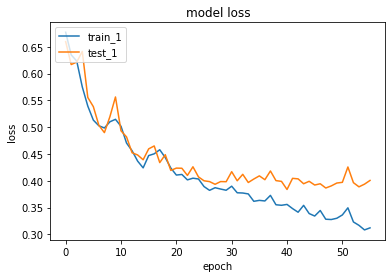

In [33]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
#plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_1', 'test_1'], loc='upper left')
plt.show()

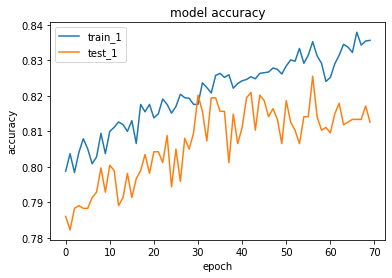

In [45]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
#plt.plot(history2.history['accuracy'])
#plt.plot(history2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train_1', 'test_1','train_2', 'test_2'], loc='upper left')
plt.show()

In [48]:
test_loss, test_acc = convNN2.evaluate(np.array(Xtestl_n), np.array(Ytest))
print('Test accuracy:', test_acc)
Ypred_raw=convNN2.predict(np.array(Xtestl_n))
Ypred=np.argmax(Ypred_raw, axis=1)
Ytest_new=np.argmax(Ytest,axis=1)
cm = confusion_matrix(Ytest_new, Ypred)
print(cm)

'''test_loss2, test_acc2 = convNN2.evaluate(np.array(Xtest2), np.array(Ytest2))
print('Test accuracy:', test_acc2)
Ypred_raw2=convNN2.predict(np.array(Xtest2))
Ypred2=np.argmax(Ypred_raw2, axis=1)
Ytest_new2=np.argmax(Ytest2,axis=1)
cm2 = confusion_matrix(Ytest_new2, Ypred2)
print(cm2)'''

52/52 [==============================] - 1s 20ms/step - loss: 0.4151 - accuracy: 0.8240
Test accuracy: 0.8240291476249695
[[549 149]
 [141 809]]


"test_loss2, test_acc2 = convNN2.evaluate(np.array(Xtest2), np.array(Ytest2))\nprint('Test accuracy:', test_acc2)\nYpred_raw2=convNN2.predict(np.array(Xtest2))\nYpred2=np.argmax(Ypred_raw2, axis=1)\nYtest_new2=np.argmax(Ytest2,axis=1)\ncm2 = confusion_matrix(Ytest_new2, Ypred2)\nprint(cm2)"